## Ising model, Monte Carlo simulation - Metropolis algorithm
    

In [37]:
%matplotlib inline
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [38]:
class Grid(object):
    
    def __init__(self,N):
        self.N = N
        self.config = 2*np.random.randint(2, size=(N,N))-1
        self.invBolzConst = 1.0 / (1.38*10**(-23))
        
    def mc_move(self, invT):
        '''MC move using Metropolis Algorithm'''
        N = self.N
        for k in range(N):
            for m in range(N):
                x = np.random.randint(0, N)
                y = np.random.randint(0, N)
                s =  self.config[x, y]
                nb = 0
                nb += self.config[(x-1)%N,y]
                nb += self.config[x,(y-1)%N]
                nb += self.config[(x+1)%N,y]
                nb += self.config[x,(y+1)%N]
                cost = 2*s*nb
                beta = self.invBolzConst*invT
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                self.config[x, y] = s
        
    def equilibration(self, n_steps, iT):
        for i in range(n_steps):         # equilibrate
            self.mc_move(iT)           # Monte Carlo moves
            
    def energy(self):
        ''' Calculate energy of given configuration'''
        E = 0
        N = self.N
        for x in range(N):
            for y in range(N):
                s =  self.config[x, y]
                nb = 0
                nb += self.config[(x-1)%N,y]
                nb += self.config[x,(y-1)%N]
                nb += self.config[(x+1)%N,y]
                nb += self.config[x,(y+1)%N]
                E += -nb*s
        return E/4
    
    def magnetization(self):
        ''' Calculate magnetization of configuration'''
        return np.sum(self.config)

In [39]:
## change these parameters for a smaller (faster) simulation 
temperaturePoints = 40 
gridSize = 12 
equilibrationSteps = 2**10       
mcSteps = 2**10       #  number of MC sweeps for calculation
temperatureBoundary = [1.0, 4.0]
temperatures = np.linspace(temperatureBoundary[0], temperatureBoundary[1], temperaturePoints); 
E, M = np.zeros(temperaturePoints), np.zeros(temperaturePoints)
C, X = np.zeros(temperaturePoints), np.zeros(temperaturePoints)

n1, n2  = 1.0/(gridSize*gridSize*mcSteps), 1.0/(gridSize*gridSize*mcSteps*mcSteps) 
# scale with system size and steps


In [40]:
grid = Grid(gridSize)

[[ 1  1  1 -1 -1 -1  1 -1  1  1 -1  1]
 [-1  1 -1  1 -1  1  1 -1  1  1 -1 -1]
 [-1  1  1 -1  1 -1  1 -1 -1  1  1 -1]
 [-1  1 -1  1 -1  1 -1  1  1 -1 -1  1]
 [ 1  1 -1 -1  1  1 -1 -1  1 -1 -1  1]
 [ 1  1  1  1  1  1 -1 -1 -1 -1 -1  1]
 [-1 -1 -1  1 -1 -1  1 -1 -1  1 -1  1]
 [-1 -1 -1 -1  1  1  1 -1 -1  1  1 -1]
 [ 1  1  1  1 -1  1  1 -1 -1  1  1  1]
 [ 1 -1  1  1  1  1 -1  1 -1  1  1 -1]
 [-1 -1  1 -1  1  1 -1 -1  1  1  1 -1]
 [ 1 -1  1  1  1  1 -1 -1  1 -1  1 -1]]


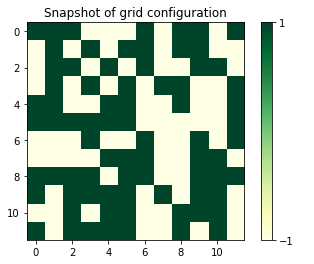

In [58]:
print(grid.config)
fig, ax = plt.subplots()
ax.set_title("Snapshot of grid configuration")
cbar = ax.figure.colorbar(im, ax=ax, )
cbar.ax.set_ylabel(" ", rotation=-90, va="bottom")
cbar.set_ticks([-1.0 , 1.0])
cbar.values = [-1.0, 1.0]
im = ax.imshow(grid.config, cmap='YlGn')


In [34]:
#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------
for t in range(temperaturePoints):
    E1 = M1 = E2 = M2 = 0
    grid = Grid(gridSize)
    invT=1.0/temperatures[t];
    invT2=invT*invT;
    
    grid.equilibration(equilibrationSteps, invT)           # Monte Carlo moves

    for i in range(mcSteps):
        grid.mc_move(invT)           
#         Ene = calcEnergy(config)     # calculate the energy
#         Mag = calcMag(config)        # calculate the magnetisation
        En = grid.energy()
        Mag = grid.magnetization()
        E1 = E1 + En
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + En*En

    E[t] = n1*E1
    M[t] = n1*M1
    C[t] = (n1*E2 - n2*E1*E1)*invT2
    X[t] = (n1*M2 - n2*M1*M1)*invT

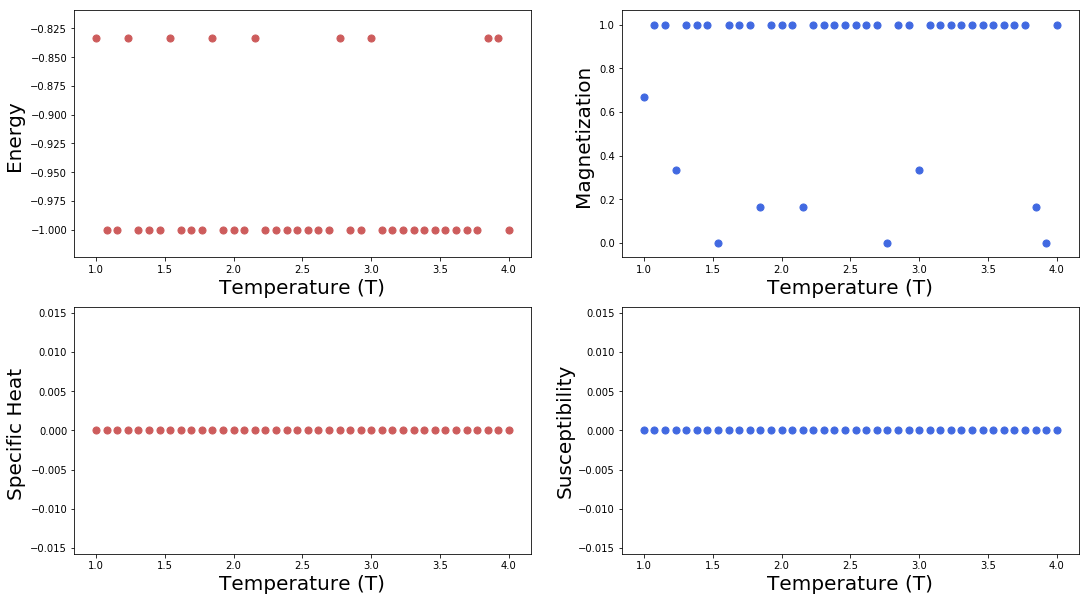

In [35]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(temperatures, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(temperatures, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(temperatures, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(temperatures, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');